<a href="https://colab.research.google.com/github/victorguillermo07/Trabajo-Practico-1/blob/master/trabajo_Practico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd

from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [15]:

#cargamos información en el dataframe y muestra del mismo
import io
train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('latin-1')))
print(train
    )

         id keyword  ...                                               text target
0         1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1         4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2         5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3         6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4         7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1
...     ...     ...  ...                                                ...    ...
7608  10869     NaN  ...  Two giant cranes holding a bridge collapse int...      1
7609  10870     NaN  ...  @aria_ahrary @TheTawniest The out of control w...      1
7610  10871     NaN  ...  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...      1
7611  10872     NaN  ...  Police investigating after an e-bike collided ...      1
7612  10873     NaN  ...  The Latest: More Homes Razed by Northern Calif...      1

[76

In [0]:
#¿Cuales son los nombre de las columnas del dataframe?

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
#obtenemos 5 features (id, keyword, location, text and target) cada uno aporta información diferente

In [35]:
 #obtencion de la cantidad total de filas y columnas
print("Train Dimensions: ", train.shape)

Train Dimensions:  (7613, 5)


In [0]:

#¿Qué significan estos features?
    
#id - identificador unico para cada  tweet
#text - el texto del tweet
#location - ubicación desde donde fue enviado (podría no estar)
#keyword - un keyword para el tweet  (podría faltar)
#target - en train.csv, indica si se trata de un desastre real  (1) o no (0)


In [0]:
¿Hay datos nulos en el dataframe?
# verificamos la cantidad de datos nulos por columna

train.isnull().sum()



id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [36]:
#tipos de datos que contiene cada columna
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [0]:
# ¿Cuales son los valores de Keyword y cuantas ocurrencias tiene cada uno de estos valores?
keyword = train['keyword'].value_counts()
keyword

fatalities               45
armageddon               42
deluge                   42
body%20bags              41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [20]:
#¿Cuales son los valores de location y cuantas ocurrencias tiene cada uno de estos valores?
location=train['location'].value_counts()
location

USA                        104
New York                    71
United States               50
London                      45
Canada                      29
                          ... 
Northern Kentucky, USA       1
-?s?s?j??s-                  1
Where I Need To Be           1
somewhere in cali            1
New York, United States      1
Name: location, Length: 3341, dtype: int64

In [0]:
#Analizamos los porcentajes datos nulos por columnas
train_porcentajes_datos_nulos= train.isnull().mean()*100
porcentajes_datos_nulos= pd.DataFrame({'Porcentaje de datos Nulos en Train': train_porcentajes_datos_nulos.sort_values(ascending=False)})
porcentajes_datos_nulos

,Porcentaje de datos Nulos en Train
location,33.272035
keyword,0.801261
target,0.000000
text,0.000000
id,0.000000


In [0]:
# vemos un ejemplo de un twitt que no indica un desastre real
falso_desastre = train[train['target']==0]['text']

# ingresamos a la 4 fila para ver el valor de no_desastre en esa fila
falso_desastre.values[4]


'What a goooooooaaaaaal!!!!!!'

In [108]:
#vemos un ejemplo de un twitt que indica un desastre real 
real_desastre = train[train['target']==1]['text']
real_desastre.values[5]

'#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'

In [109]:

real_desastre.head()

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

In [110]:
falso_desastre.head()

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0


In [50]:
#Cantidad de desastres reales (1), cantidad de desastres falsos (0)
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

[Text(0, 0.5, ' cantidad'), Text(0.5, 0, 'target')]

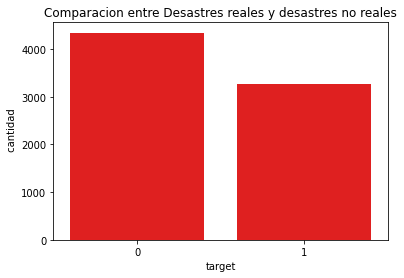

In [67]:
#visualizacion de desastres falsos(0) y desastres reales(1)
fig=sns.barplot(train['target'].value_counts().index, train['target'].value_counts(),color ='red')
plt.title('Comparacion entre Desastres reales y desastres no reales')
fig.set(xlabel='target', ylabel=' cantidad')

In [71]:
#Relacion entre text y keyword para ver como estan clasificados los twitts, algunas keywords pueden no estar.
text_and_keyword = train[['text','keyword']]
text_and_keyword

,text,keyword
0,Our Deeds are the Reason of this #earthquake M...,NaN
1,Forest fire near La Ronge Sask. Canada,NaN
2,All residents asked to 'shelter in place' are ...,NaN
3,"13,000 people receive #wildfires evacuation or...",NaN
4,Just got sent this photo from Ruby #Alaska as ...,NaN
...,...,...
7608,Two giant cranes holding a bridge collapse int...,NaN
7609,@aria_ahrary @TheTawniest The out of control w...,NaN
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,NaN
7611,Police investigating after an e-bike collided ...,NaN


[Text(17.19999999999999, 0.5, 'Keyword'),
 Text(0.5, 17.200000000000003, 'cantidad de twitts')]

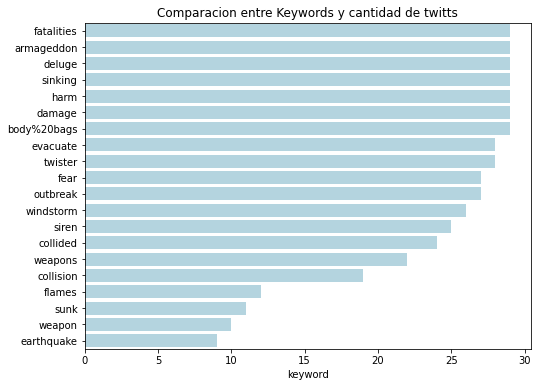

In [102]:
# Representamos la relacion entre la keyword y la cantidad de tweets
figure = plt.figure(figsize=(8,6))
sns.barplot(y=train['keyword'].value_counts().index[:20], x=train['keyword'].value_counts()[-20:],color = 'lightblue')
plt.title('Comparacion entre Keywords y cantidad de twitts')
fig.set(xlabel='cantidad de twitts', ylabel='Keyword')


[Text(0, 0.5, 'Localización'), Text(0.5, 0, 'Cantidad de twitts')]

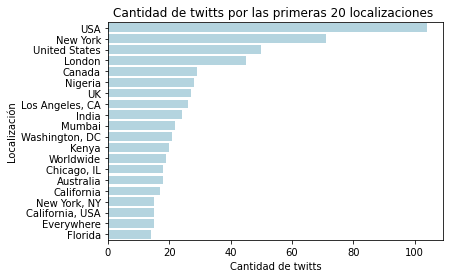

In [103]:
#Representamos en un barplot las primeras 20 localizaciones de donde se envian mayor cantidad de twitts

plt.title('Cantidad de twitts por las primeras 20 localizaciones ')
fig.set(xlabel='Cantidad', ylabel='Localización')
fig=sns.barplot(y=train['location'].value_counts().index[:20], x=train['location'].value_counts()[:20], color='lightblue')
fig.set(xlabel='Cantidad de twitts', ylabel='Localización')




[Text(0, 0.5, 'Localización'), Text(0.5, 0, 'Cantidad')]

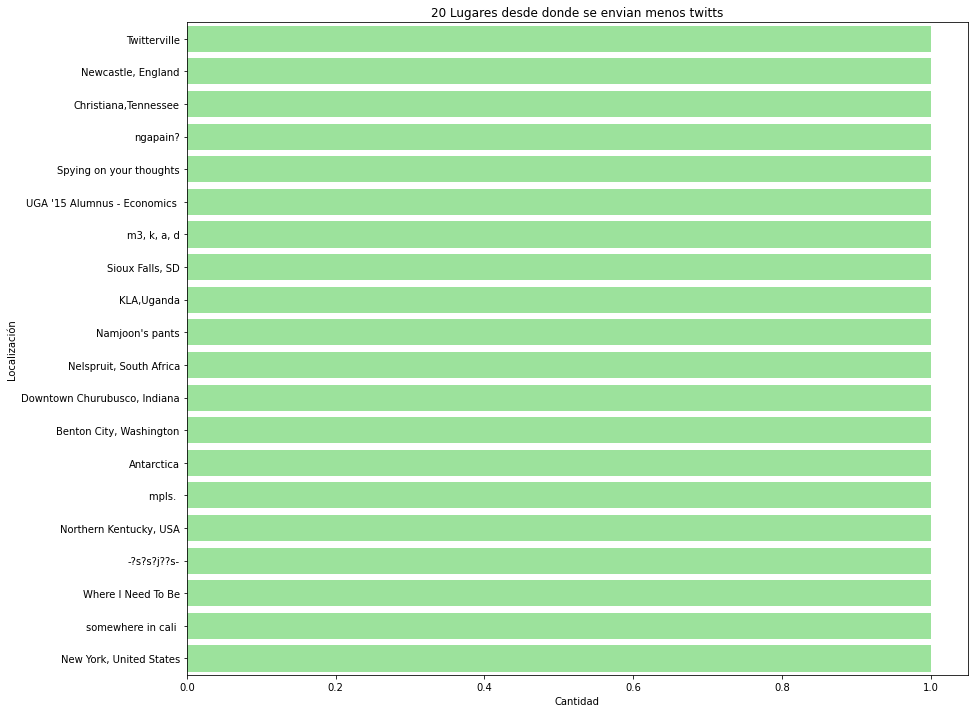

In [104]:
# Visualisamos con un barplot las 20 localizaciones de donde se envian menor cantidad de twitts
igure = plt.figure(figsize=(14,12))
fig=sns.barplot(y=train['location'].value_counts().index[-20:], x=train['location'].value_counts()[-20:],color='lightgreen')
plt.title('20 Lugares desde donde se envian menos twitts')
fig.set(xlabel='Cantidad', ylabel='Localización')